In [1]:
import sqlite3
import pandas as pd

# Show info of table
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
q1 = "SELECT * FROM sqlite_master WHERE type = 'table'" 
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
# Display the first five rows
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
# Show some of the statistical summary
q3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
# Countries with a population of 0
q4 = "SELECT * FROM facts WHERE population = 0"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
# Countries with a population of 7256490011
q5 = "SELECT * FROM facts WHERE population = 7256490011"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


These two entires can be seen as outliers. One row seems to refer to the whole world.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9033813c88>,
      dtype=object)

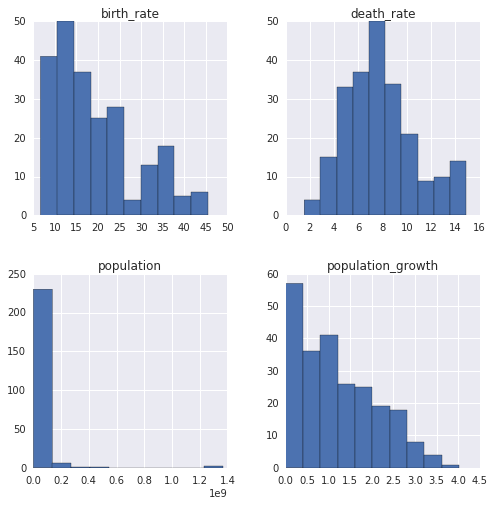

In [9]:
# Select rows without these two outliers
q6 = '''
SELECT population, population_growth, birth_rate, death_rate FROM facts 
WHERE population != (SELECT MAX(population) FROM facts) and 
population != (SELECT MIN(population) FROM facts)
'''

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

pd.read_sql_query(q6, conn).hist(ax = ax)

In [11]:
# Sort the countries by population density
q7 = '''
SELECT name, CAST(population as Float) / CAST(area as Float) pop_density 
FROM facts ORDER BY pop_density DESC'''

pd.read_sql_query(q7, conn)

,name,pop_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
